# i. Perkenalan
>Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

Nama : Nailina Farah

Batch : FTDS_RMT_28

Dataset : rideshare_kaggle

Problem Statement : Dalam industri ride-hailing, harga perjalanan adalah faktor kunci yang memengaruhi keputusan pengguna dalam memilih layanan. Namun, harga perjalanan dipengaruhi oleh berbagai faktor. Oleh karena itu, pengembangan model regresi linear untuk memprediksi harga perjalanan menjadi penting karena dapat membantu pengguna merencanakan perjalanan dengan lebih baik, mengoptimalkan anggaran, dan memilih layanan yang sesuai. Dengan adanya model ini, diharapkan pengalaman pengguna dalam menggunakan layanan ride-hailing dapat ditingkatkan dan mereka dapat membuat keputusan yang lebih cerdas.

Objective: Project ini merupakan pembuatan model regresi linear dengan tujuan memprediksi harga perjalanan platform ride-hailing agar dapat mengoptimalkan budget sesuai kondisi.

# ii. Import Libraries
> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [541]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle
import json


# iii. Data Loading
> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [542]:
# Load dataset
df_ori = pd.read_csv('rideshare_kaggle.csv')

# Duplicate data ori
df = df_ori.copy()

# Show top 5 dataset
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


Dataset rideshare_kaggle terdiri dari 57 kolom

In [543]:
# Check Dataset 1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Dari 57 kolom, 29 kolom bertipe float (numerik), 17 kolom bertipe integer (numerik), dan 11 kolom lainnya bertipe object (kategorik). Dari semua kolom, hanya kolom price yang memiliki missing value. Namun, saya akan mengubah kolom datetime menjadi tipe datetime bukan object.

In [544]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [545]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           693071 non-null  object        
 1   timestamp                    693071 non-null  float64       
 2   hour                         693071 non-null  int64         
 3   day                          693071 non-null  int64         
 4   month                        693071 non-null  int64         
 5   datetime                     693071 non-null  datetime64[ns]
 6   timezone                     693071 non-null  object        
 7   source                       693071 non-null  object        
 8   destination                  693071 non-null  object        
 9   cab_type                     693071 non-null  object        
 10  product_id                   693071 non-null  object        
 11  name                      

In [546]:
# Check Dataset 2
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Setelah dilihat, jumlah missing value dari kolom price yaitu sebanyak 55095.

In [547]:
# Check Dataset 3
df.describe()

,timestamp,hour,day,month,datetime,price,distance,surge_multiplier,latitude,longitude,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,693071,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,2018-12-05 21:35:09.269777152,16.545125,2.189430,1.013870,42.338172,-71.066151,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
min,1.543204e+09,0.000000,1.000000,11.000000,2018-11-26 03:40:46,2.500000,0.020000,1.000000,42.214800,-71.105400,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,2018-11-28 22:26:08,9.000000,1.280000,1.000000,42.350300,-71.081000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,2018-12-02 07:57:57,13.500000,2.160000,1.000000,42.351900,-71.063100,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,2018-12-14 22:45:08,22.500000,2.920000,1.000000,42.364700,-71.054200,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,2018-12-18 19:15:10,97.500000,7.860000,3.000000,42.366100,-71.033000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09
std,6.891925e+05,6.948114,9.982286,0.492429,NaN,9.324359,1.138937,0.091641,0.047840,0.020302,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05


Mendeskripsi data numerik sejumlah 46 kolom.

In [548]:
# Memilih hanya kolom-kolom numerik
numeric_data = df.select_dtypes(include=['int', 'float'])

# Menampilkan nilai skew untuk setiap kolom numerik
skewness = numeric_data.skew()

skewness

timestamp                      0.432580
hour                          -0.045432
day                           -0.375471
month                         -0.352070
price                          1.045747
distance                       0.834395
surge_multiplier               8.320248
latitude                      -2.116052
longitude                     -0.354442
temperature                   -0.609040
apparentTemperature           -0.393775
precipIntensity                3.325536
precipProbability              2.027870
humidity                      -0.075395
windSpeed                      0.451110
windGust                       1.118739
windGustTime                   0.439010
visibility                    -1.507075
temperatureHigh                0.076218
temperatureHighTime            0.429892
temperatureLow                -0.334683
temperatureLowTime             0.441533
apparentTemperatureHigh        0.069811
apparentTemperatureHighTime    0.426763
apparentTemperatureLow        -0.501241


Dari hasil didapatkan beberapa kolom dengan nilai skewness yang jauh dari 0, diantaranya:
- surge_multiplier (8.320248)
- precipIntensity (3.325536)
- precipProbability (2.027870)
- uvIndex (1.680640)
- windGust (1.118739)

# iv. Exploratory Data Analysis (EDA)
> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

## Melihat distribusi dan outlier pada kolom tertentu

Karena pada perhitungan sebelumnya terdapat beberapa feature yang nilai skewness jauh dari 0, perlu dilihat bagaimana distribusinya dan sebaran outliernya

<Axes: >

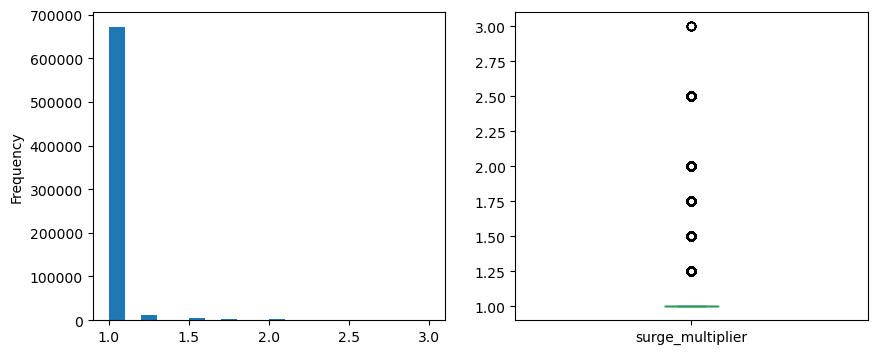

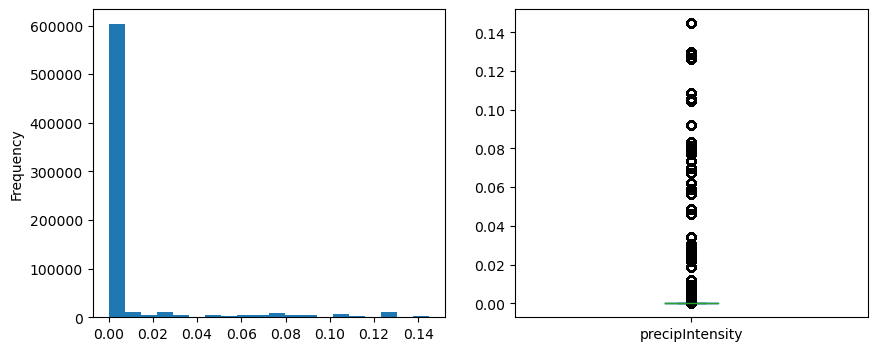

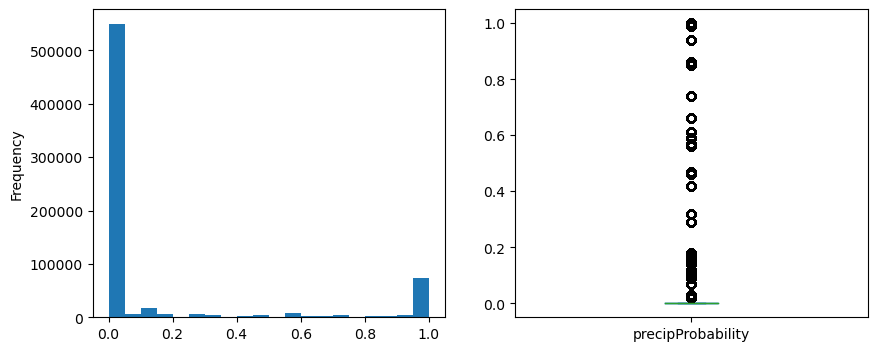

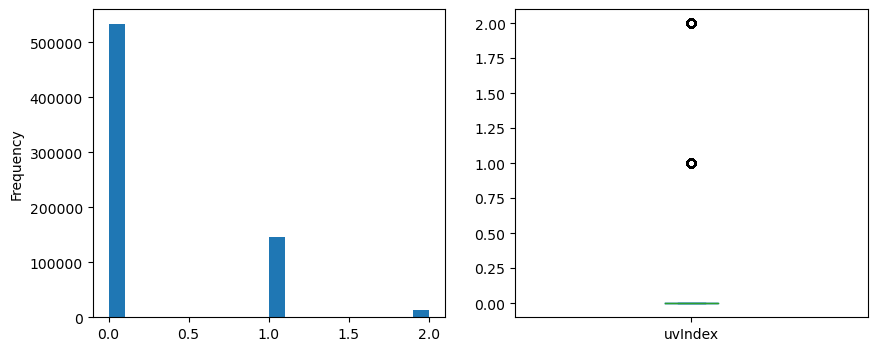

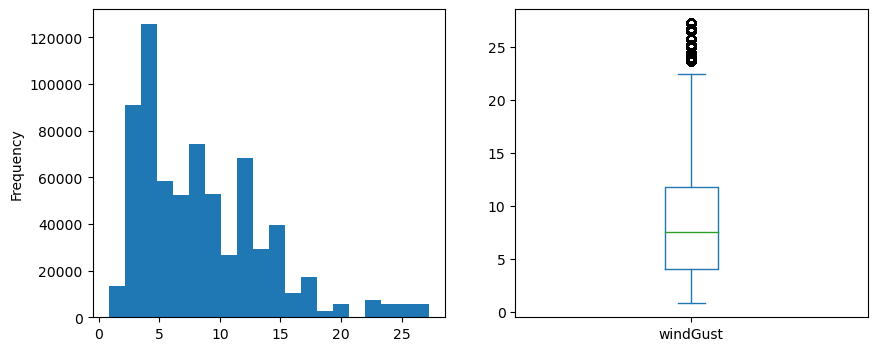

In [549]:
# visualisasi 1: melihat distribusi dari feature berikut: 'surge_multiplier', 'precipIntensity', 'precipProbability', 'uvIndex', 'windGust'
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

df['surge_multiplier'].plot(kind='hist',bins=20,ax=ax[0])
df['surge_multiplier'].plot(kind='box',ax=ax[1])

fig, ax = plt.subplots(ncols=2,figsize=(10,4))

df['precipIntensity'].plot(kind='hist',bins=20,ax=ax[0])
df['precipIntensity'].plot(kind='box',ax=ax[1])

fig, ax = plt.subplots(ncols=2,figsize=(10,4))

df['precipProbability'].plot(kind='hist',bins=20,ax=ax[0])
df['precipProbability'].plot(kind='box',ax=ax[1])

fig, ax = plt.subplots(ncols=2,figsize=(10,4))

df['uvIndex'].plot(kind='hist',bins=20,ax=ax[0])
df['uvIndex'].plot(kind='box',ax=ax[1])

fig, ax = plt.subplots(ncols=2,figsize=(10,4))

df['windGust'].plot(kind='hist',bins=20,ax=ax[0])
df['windGust'].plot(kind='box',ax=ax[1])

Dari gambar terlihat bahwa sebaran datanya memang condong dan terdapat beberapa feature yang outliernya cukup banyak seperti precipIntensity, precipProbability, windGust.

## Visualisai Distribusi Harga Perjalanan

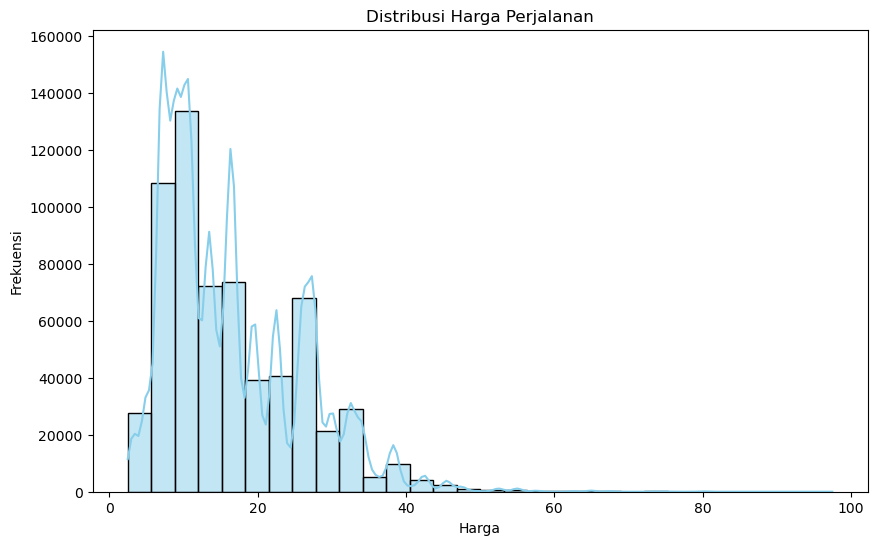

In [550]:
# Visualisasi 2: Distribusi harga perjalanan
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Harga Perjalanan')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()

Dari visualisasi tersebut, terlihat bahwa frekuensi akan banyak saat harga dibawah 20 dan semakin tinggi harga yang ditawarkan, frekuensi akan semakin berkurang.

## Visualisai Tipe Taksi

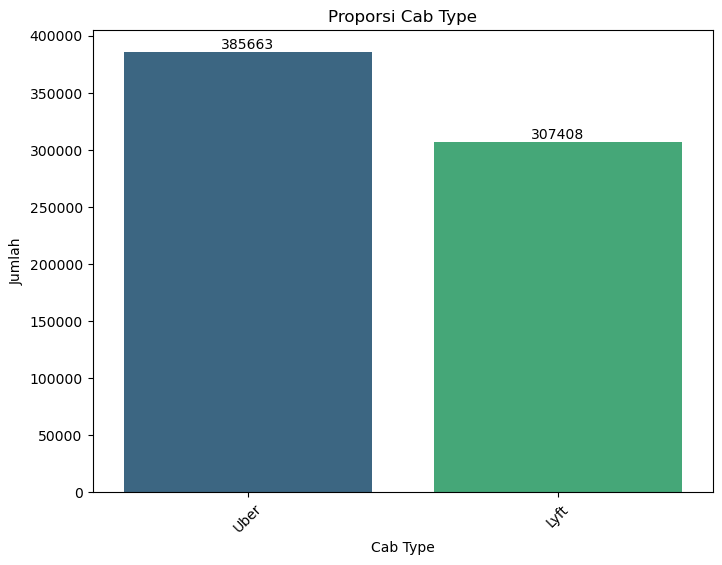

In [551]:
# Visualisasi 3: Frekuensi tipe taksi

# Menghitung jumlah entri untuk setiap cab_type
cab_type_counts = df['cab_type'].value_counts()

# Membuat visualisasi dengan bar plot
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x=cab_type_counts.index, y=cab_type_counts.values, palette='viridis')
plt.title('Proporsi Cab Type')
plt.xlabel('Cab Type')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)

# Menambahkan label nilai di atas setiap bar
for index, value in enumerate(cab_type_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

Dari visualisasi tersebut, tipe taksi yang paling banyak dipesan adalah uber sebanyak 385.663 pesanan dibandingkan lyft hanya sebanyak 307.408 pesanan. Kemudian saya akan melihat rata-rata harganya.

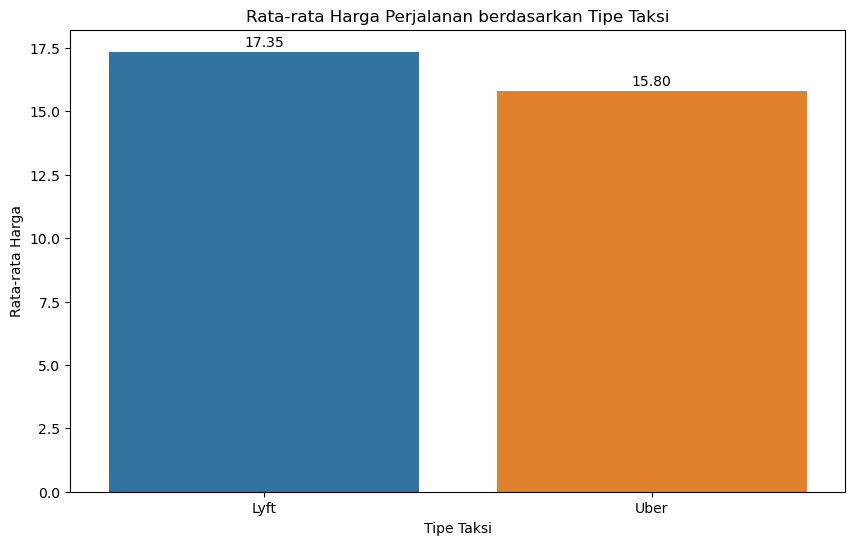

In [552]:
# Visualisasi 4: Perbandingan rata-rata harga perjalanan berdasarkan tipe taksi
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='cab_type', y='price', data=df, estimator=np.mean, errorbar=None)
plt.title('Rata-rata Harga Perjalanan berdasarkan Tipe Taksi')
plt.xlabel('Tipe Taksi')
plt.ylabel('Rata-rata Harga')

# Menambahkan label nilai di atas setiap bar
for index, value in enumerate(df.groupby('cab_type')['price'].mean()):
    plt.text(index, value + 0.1, f'{value:.2f}', ha='center', va='bottom')

plt.show()

Ternyata dari rata-rata harga, Lyft memang lebih mahal dibandingkan dengan uber yaitu 17.35 sehingga user lebih memilih uber karena relatif lebih murah dengan rata-rata harga 15.80.

## Visualisai Jenis Layanan Taksi

posx and posy should be finite values
posx and posy should be finite values


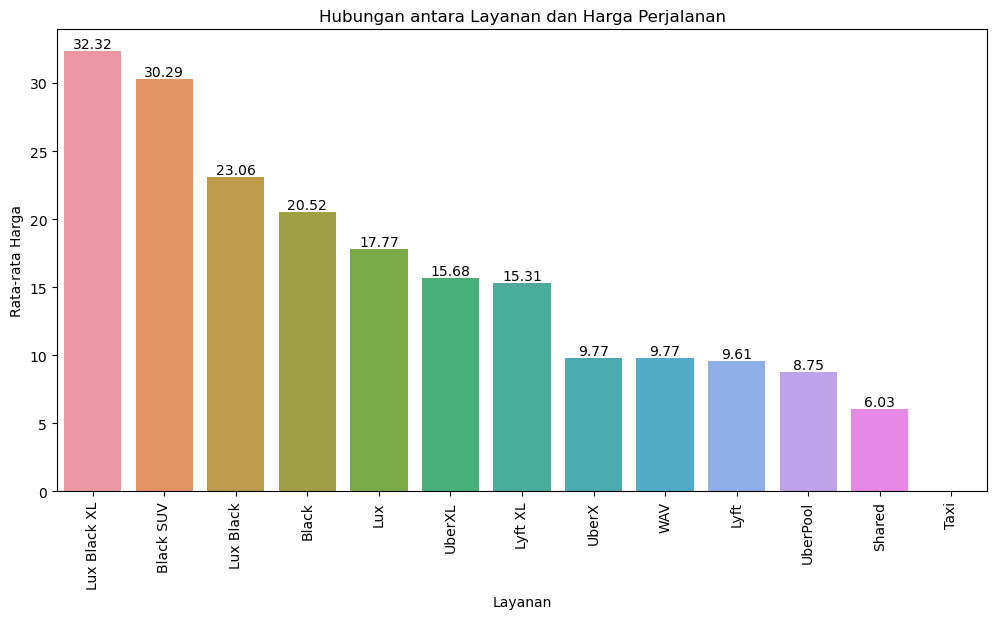

In [553]:
# Visualisasi 5: Perbandingan rata-rata harga perjalanan berdasarkan jenis layanan taksi

# Menghitung rata-rata harga perjalanan untuk setiap nilai 'name' atau layanan
avg_price_by_name = df.groupby('name')['price'].mean().reset_index()
avg_price_by_name = avg_price_by_name.sort_values(by='price', ascending=False)  # Mengurutkan berdasarkan rata-rata harga

# Membuat visualisasi dengan bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='name', y='price', data=avg_price_by_name, order=avg_price_by_name['name'])
plt.title('Hubungan antara Layanan dan Harga Perjalanan')
plt.xlabel('Layanan')
plt.ylabel('Rata-rata Harga')
plt.xticks(rotation=90)  # Untuk memutar label x agar lebih mudah dibaca

# Menambahkan label nilai di atas setiap bar
for index, value in enumerate(avg_price_by_name['price']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()

Dari visualisasi diatas, tipe layanan taksi "Lux Black XL" merupakan layanan taxi dengan rata-rata harga paling tinggi yaitu sebesar 32.32 sedangkan rata-rata harga paling murah yaitu tipe layanan "Shared" dengan nilai 6.03. Kemudian saya ingin melihat frekuensi tipe layanan yang telah dipesan user.

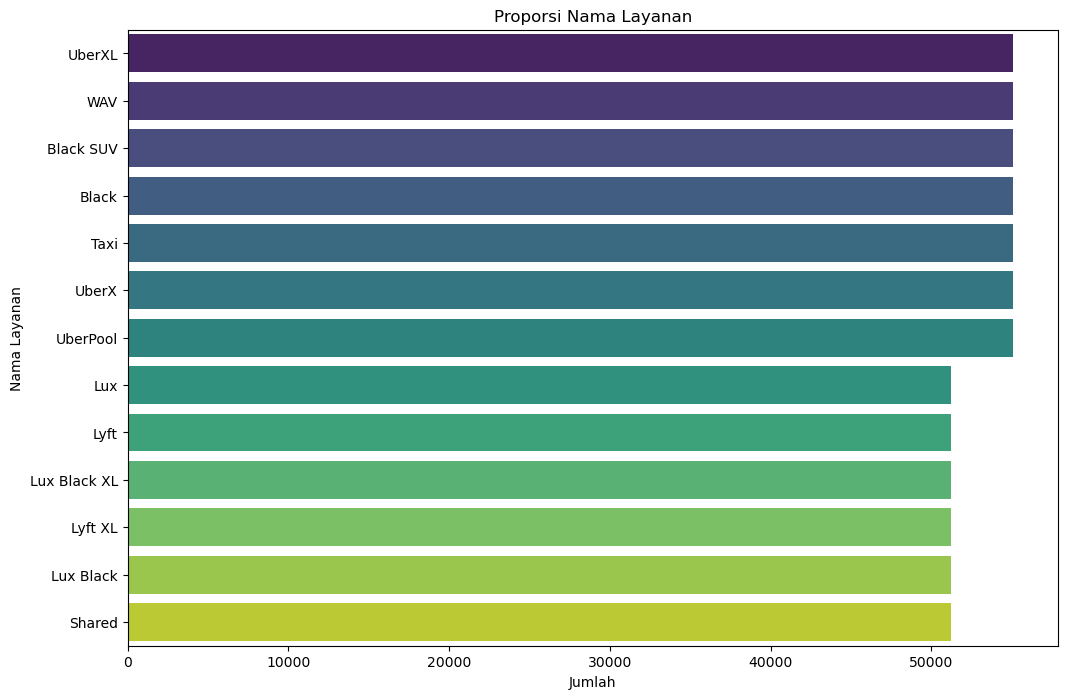

In [554]:
# Visualisasi 6: Distribusi layanan taksi
# Menghitung jumlah entri untuk setiap name
name_counts = df['name'].value_counts()

# Membuat visualisasi dengan bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=name_counts.values, y=name_counts.index, palette='viridis')
plt.title('Proporsi Nama Layanan')
plt.xlabel('Jumlah')
plt.ylabel('Nama Layanan')
plt.show()

Dari visualisasi ini memperlihatkan bahwa layanan "Lux Black XL" dan "Shared" memiliki frekuensi yang tidak jauh berbeda, sehingga kemungkinan rata-rata harga tidak terlalu memengaruhi user dalam memesan jenis layanan yang diberikan pihak taksi.

## Visualisasi Hubungan Jam dan Harga Perjalanan

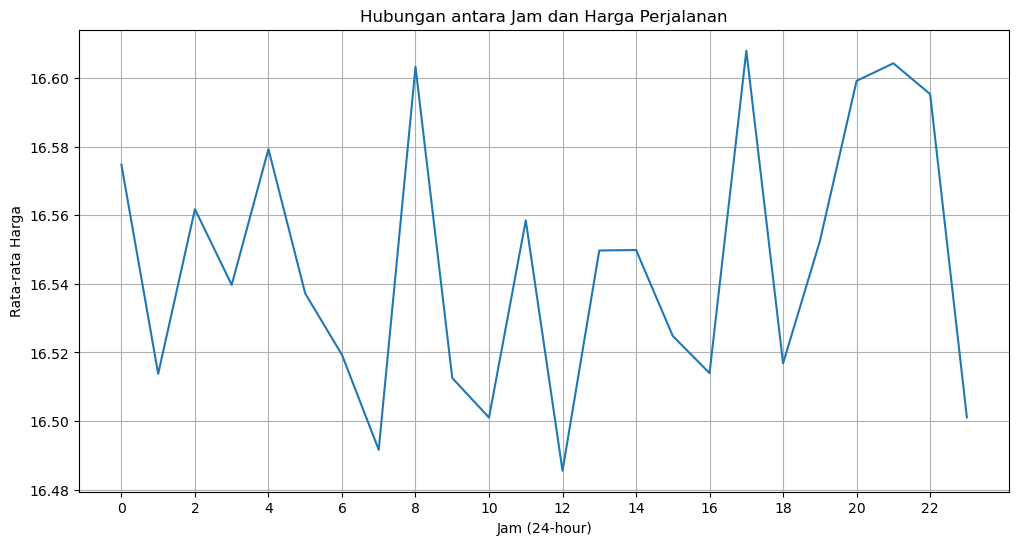

In [555]:
# Visualisasi 7: Hubungan Jam dan Harga Perjalanan

# Membuat visualisasi dengan line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='price', data=df, estimator='mean', errorbar=None)
plt.title('Hubungan antara Jam dan Harga Perjalanan')
plt.xlabel('Jam (24-hour)')
plt.ylabel('Rata-rata Harga')
plt.grid(True)

# Menyesuaikan label sumbu x dengan rentang 1 atau 2
plt.xticks(range(0, 24, 2))  # Rentang nilai dari 0 hingga 23 dengan interval 2

plt.show()

Dari grafik line diatas, dapat terlihat bahwa jam 08.00 dan jam 17.00 merupakan waktu dimana rata-rata harga cukup tinggi dibandingkan waktu lainnya. Hal tersebut mungkin terjadi karena jam 08.00 adalah waktu orang berangkat untuk mulai beraktivitas dan jam 17.00 adalah waktu orang selesai beraktivitas sehingga di kedua waktu tersebut, banyak pengguna memesan kendaraan yang mengakibatkan rata-rata harga pun meningkat karena jam sibuk.

## Visualisasi Cuaca

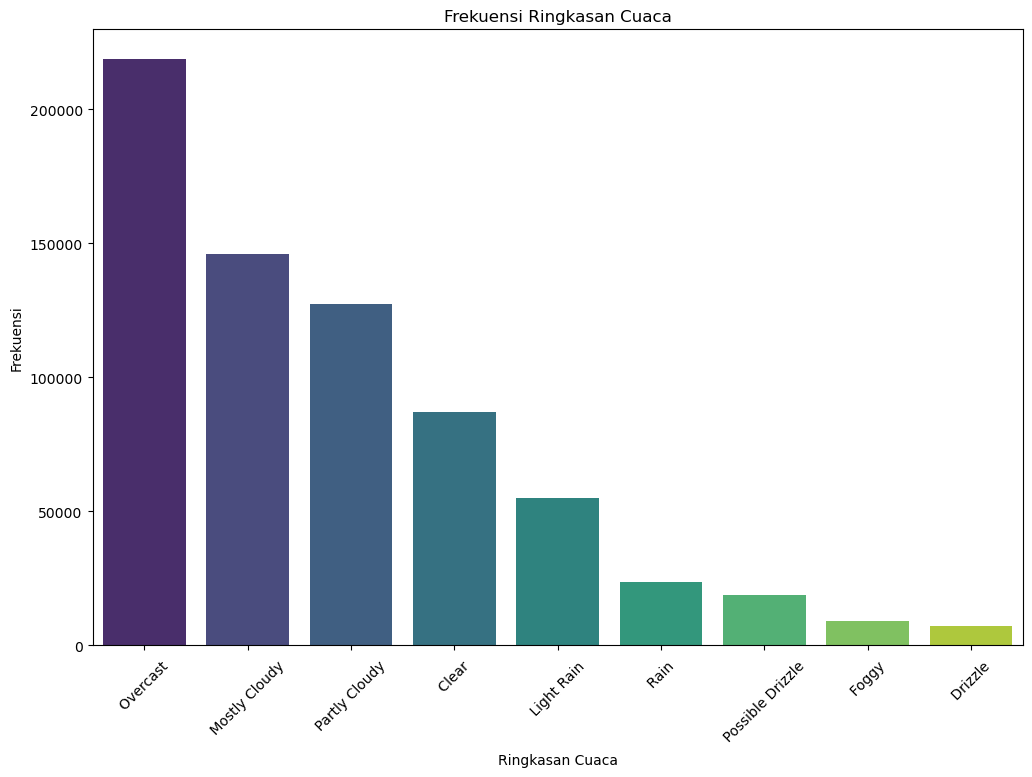

In [556]:
# Visualisasi 8 : frekuensi user memesan taxi di berbagai cuaca

# Menghitung frekuensi setiap ringkasan cuaca
summary_counts = df['short_summary'].value_counts()

# Membuat visualisasi dengan bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=summary_counts.index, y=summary_counts.values, palette='viridis')
plt.title('Frekuensi Ringkasan Cuaca')
plt.xlabel('Ringkasan Cuaca')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.show()

Dari grafik diatas, dapat terlihat bahwa frekuensi terbanyak user memesan taksi saat cuaca dalam keadaan mendung. Namun anehnya saat hujan dan hujan ringan, pemesanan taksi cenderung rendah.

## Visualisasi Hubungan Short_Summary dengan Price

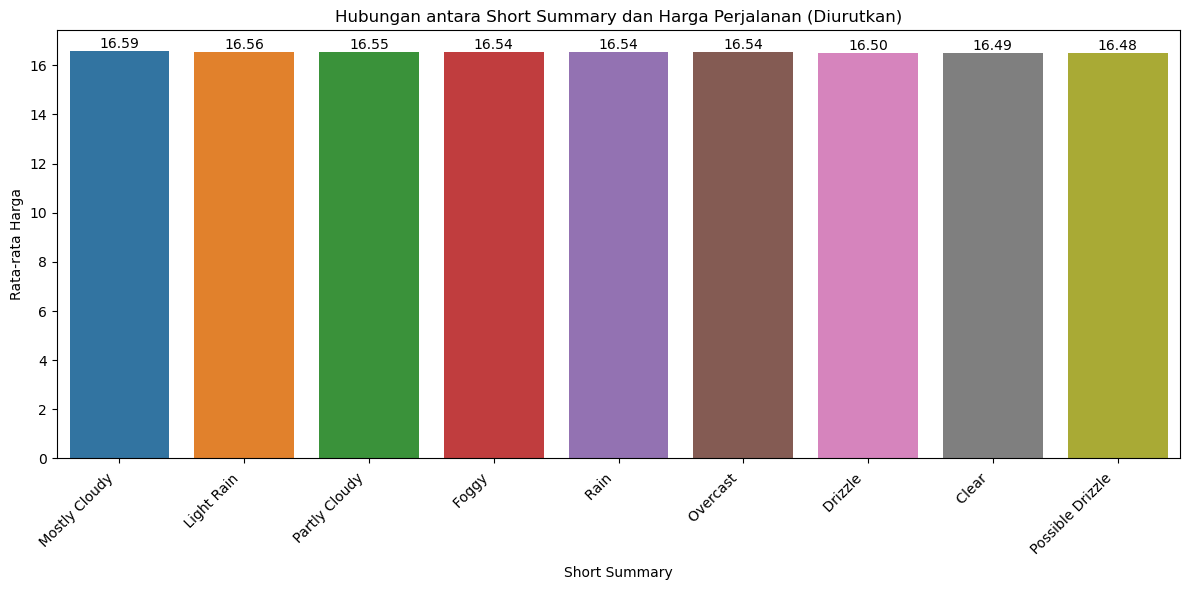

In [557]:
# Visualisasi 9: Hubungan Short_Summary dengan Price

# Menghitung rata-rata harga perjalanan untuk setiap 'short_summary'
avg_price_by_summary = df.groupby('short_summary')['price'].mean().reset_index()
avg_price_by_summary = avg_price_by_summary.sort_values(by='price', ascending=False)

# Membuat visualisasi dengan bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='short_summary', y='price', data=avg_price_by_summary, errorbar=None, order=avg_price_by_summary['short_summary'])
plt.title('Hubungan antara Short Summary dan Harga Perjalanan (Diurutkan)')
plt.xlabel('Short Summary')
plt.ylabel('Rata-rata Harga')

# Menampilkan nilai di setiap bar
for index, value in enumerate(avg_price_by_summary['price']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')  # Memutar label x agar lebih mudah dibaca
plt.tight_layout()
plt.show()

Dari grafik tersebut, rata-rata harga di setiap cuaca relatif sama

# v. Feature Engineering
> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## Feature Selection

Saya akan menghapus beberapa kolom yang sekiranya tidak diperlukan atau sudah diwakilkan oleh kolom lain diantaranya:
- id: tidak diperlukan karena sudah dicek tidak ada data duplikat
- timestamp: tidak diperlukan
- datetime: diwakilkan oleh kolom hour, day, month untuk year semuanya sama yaitu tahun 2018
- timezone: hanya satu value yaitu america/new_York sehingga tidak diperlukan
- source: diwakilkan oleh distance
- destination: diwakilkan oleh distance
- product_id: diwakilkan oleh name dan karena unique valuenya kurang baik, maka didrop
- surge_multiplier: tidak diperlukan
- latitude,longitude, temperature, apparentTemperature, long_summary,precipIntensity, precipProbability, humidity, windSpeed, windGust, windGustTime, visibility, temperatureHigh, temperatureHighTime, temperatureLow, temperatureLowTime, apparentTemperatureHigh, apparentTemperatureHighTime, apparentTemperatureLow, apparentTemperatureLowTime, icon, dewPoint, pressure, windBearing, cloudCover, visibility.1, ozone, sunriseTime, sunsetTime, moonPhase, precipIntensityMax, uvIndexTime, temperatureMin, temperatureMinTime, temperatureMax, temperatureMaxTime, apparentTemperatureMin, apparentTemperatureMinTime, apparentTemperatureMax, apparentTemperatureMaxTime: tidak diperlukan

In [558]:
# Kolom-kolom yang akan dihapus
columns_to_drop = [
    'id', 'timestamp', 'datetime', 'timezone', 'source', 'destination',
    'product_id', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
    'apparentTemperature', 'long_summary', 'precipIntensity', 'precipProbability',
    'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility', 
    'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
    'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow',
    'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure', 'windBearing',
    'cloudCover', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime',
    'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
    'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
    'apparentTemperatureMin', 'apparentTemperatureMinTime',
    'apparentTemperatureMax', 'apparentTemperatureMaxTime'
]

# Hapus kolom-kolom yang tidak diperlukan
df.drop(columns=columns_to_drop, inplace=True)

# Melihat data baru
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   hour           693071 non-null  int64  
 1   day            693071 non-null  int64  
 2   month          693071 non-null  int64  
 3   cab_type       693071 non-null  object 
 4   name           693071 non-null  object 
 5   price          637976 non-null  float64
 6   distance       693071 non-null  float64
 7   short_summary  693071 non-null  object 
 8   uvIndex        693071 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 47.6+ MB


Dataframe yang baru terdiri dari 693.071 baris serta 9 feature dengan 6 feature numerik dan 3 feature kategorik.

## Mengambil data inference dari data asli

In [559]:
# menyimpan 1 data random dari data asli untuk digunakan sebagai data inference ke dalam variabel data_inf
data_inf = df.sample(1, random_state=0)

# menghapus data inference dari df
df.drop(data_inf.index, inplace=True)

# melakukan reset index untuk data_inf dan df
df.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

# menghapus target di data_inf
data_inf.drop(['price'], axis=1, inplace=True)

## Split Features (X) dan target (y)

In [560]:
# Define features (X) dan target(Y) dimana X adalah features selain price, karena price menjadi target.

X = df.drop('price', axis = 1)
y = df['price']
X

,hour,day,month,cab_type,name,distance,short_summary,uvIndex
0,9,16,12,Lyft,Shared,0.44,Mostly Cloudy,0
1,2,27,11,Lyft,Lux,0.44,Rain,0
2,1,28,11,Lyft,Lyft,0.44,Clear,0
3,4,30,11,Lyft,Lux Black XL,0.44,Clear,0
4,3,29,11,Lyft,Lyft XL,0.44,Partly Cloudy,0
...,...,...,...,...,...,...,...,...
693065,23,1,12,Uber,UberXL,1.00,Partly Cloudy,0
693066,23,1,12,Uber,UberX,1.00,Partly Cloudy,0
693067,23,1,12,Uber,Taxi,1.00,Partly Cloudy,0
693068,23,1,12,Uber,Black SUV,1.00,Partly Cloudy,0


Features (X) terdiri dari 8 kolom.

## Split Train and Test set

In [561]:
# melihat shape dari features
X.shape

(693070, 8)

In [562]:
# split data train dan data test dengan 80% train set dan 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 0)

print('Train Size :', X_train.shape)
print('Test Size :', X_test.shape)
X_train

Train Size : (554456, 8)
Test Size : (138614, 8)


,hour,day,month,cab_type,name,distance,short_summary,uvIndex
660127,15,2,12,Lyft,Lux Black,2.39,Light Rain,1
252181,7,2,12,Lyft,Lyft XL,1.06,Overcast,0
81902,8,18,12,Uber,UberXL,2.12,Overcast,0
62057,10,30,11,Uber,Taxi,1.01,Clear,0
371860,21,2,12,Uber,UberX,2.45,Possible Drizzle,0
...,...,...,...,...,...,...,...,...
359783,17,1,12,Uber,UberPool,3.45,Partly Cloudy,2
152315,5,1,12,Lyft,Lux Black XL,2.87,Mostly Cloudy,0
117952,18,28,11,Uber,UberXL,3.08,Overcast,1
435829,2,14,12,Lyft,Lux Black XL,3.17,Overcast,0


Dengan pembagian 80% untuk train didapatkan data sebanyak 554.455 baris dan 20% untuk test didapatkan data sebanyak 138.614 baris.

## Handling Missing Value

In [563]:
X_train.isnull().sum()

hour             0
day              0
month            0
cab_type         0
name             0
distance         0
short_summary    0
uvIndex          0
dtype: int64

In [564]:
X_test.isnull().sum()

hour             0
day              0
month            0
cab_type         0
name             0
distance         0
short_summary    0
uvIndex          0
dtype: int64

In [565]:
y_train.isnull().sum()

44095

In [566]:
y_test.isnull().sum()

11000

Dikarenakan pada data y_train dan y_test terdapat missing value maka perlu didrop namun dengan memerhatikan indeks yang terhapus agar shape di X dan Y tetap sama.

In [567]:
# Identifikasi indeks yang terkait dengan nilai yang hilang di y_train dan y_test
missing_index_y_train = y_train[y_train.isnull()].index
missing_index_y_test = y_test[y_test.isnull()].index


# Menggunakan indeks yang sama untuk melakukan penghapusan pada X_train dan x_test
x_train_cleaned = X_train.drop(index=missing_index_y_train)
x_test_cleaned = X_test.drop(index=missing_index_y_test)

# Drop nilai yang hilang dari y_train dan y_test
y_train_cleaned = y_train.drop(index=missing_index_y_train)
y_test_cleaned = y_test.drop(index=missing_index_y_test)


In [568]:
# cek missing value di y_train setelah dihandle
y_train_cleaned.isnull().sum()

0

In [569]:
# cek missing value di y_test setelah dihandle
y_test_cleaned.isnull().sum()

0

In [570]:
# melihat shape

shapeXTrain = x_train_cleaned.shape
shapeXTest = x_test_cleaned.shape
shapeYTrain = y_train_cleaned.shape
ShapeYTest = y_test_cleaned.shape

print("Shape x_train setelah dihandle missing value adalah:", shapeXTrain)
print("Shape y_train setelah dihandle missing value adalah:", shapeYTrain)
print("Shape x_test setelah dihandle missing value adalah:", shapeXTest)
print("Shape y_test setelah dihandle missing value adalah:",ShapeYTest)

Shape x_train setelah dihandle missing value adalah: (510361, 8)
Shape y_train setelah dihandle missing value adalah: (510361,)
Shape x_test setelah dihandle missing value adalah: (127614, 8)
Shape y_test setelah dihandle missing value adalah: (127614,)


Setelah dihandle missing value di target, kemudian dicek shape setiap data dan memiliki shape yang sama antara data train dan data test.
Data train dari tetap sebanyak 510361 dan data set sebanyak 127614.

## Handling Outlier

In [571]:
# Memeriksa skewness untuk kolom numerik
selected_columns = ['hour', 'day', 'month', 'distance', 'uvIndex']

# Menghitung skewness di setiap kolom yang dipilih
skewness_selected = x_train_cleaned[selected_columns].apply(lambda x: x.skew())

# Cetak hasil skewness untuk setiap kolom yang dipilih
print("Skewness untuk kolom numerik:")
print(skewness_selected)

Skewness untuk kolom numerik:
hour       -0.045059
day        -0.375888
month      -0.352441
distance    0.820548
uvIndex     1.683299
dtype: float64


Dikarenakan terdapat skew pada kolom distance dan uvIndex maka handling dilakukan dengan tukey's rule. Namun handling outlier hanya akan dilakukan pada feature distance karena merupakan float, sedangkan untuk feature hour, day, month, dan uvIndex akan diabaikan saja karena valuenya alami seperti itu.

In [572]:
# Handle outlier pada feature distance dengan tukey's rule pada x_train_cleaned dan disamakan shape dengan y_train_cleaned

# Hitung quartile pertama dan ketiga serta interquartile range (IQR)
Q1 = np.percentile(x_train_cleaned['distance'], 25)
Q3 = np.percentile(x_train_cleaned['distance'], 75)
IQR = Q3 - Q1

# Hitung batas bawah dan batas atas untuk outlier berdasarkan Tukey's Rule
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter nilai yang berada di dalam batas bawah dan batas atas
filtered_values_x = x_train_cleaned[(x_train_cleaned['distance'] >= lower_bound) & (x_train_cleaned['distance'] <= upper_bound)]
filtered_values_y = y_train_cleaned[y_train_cleaned.index.isin(filtered_values_x.index)]

# Cetak informasi sebelum dan setelah penanganan outlier
print("Jumlah baris sebelum penanganan outlier:", len(x_train_cleaned))
print("Jumlah baris setelah penanganan outlier:", len(filtered_values_x))

# Sesuaikan y_train_cleaned
y_train_cleaned = y_train_cleaned[y_train_cleaned.index.isin(filtered_values_x.index)]


Jumlah baris sebelum penanganan outlier: 510361
Jumlah baris setelah penanganan outlier: 504968


Ternyata setelah dihandle outlier, jumlahnya datanya menjadi 510361. Kemudian, saya akan cek skew pada kolom 'distance' setelah dihandle outlier. 

In [573]:
# cek skew setelah handling outlier
filtered_values_x['distance'].skew()

0.4682110170244442

Nilai skew berubah dari 0.821167 menjadi 0.4682. Kemudian untuk memastikan, saya akan cek kembali shape pada x_train dan y_train setelah dihandle outlier.

In [574]:
# melihat shape

shapeXTrain = filtered_values_x.shape
shapeYTrain = filtered_values_y.shape

print("Shape x_train setelah dihandle missing value adalah:", shapeXTrain)
print("Shape y_train setelah dihandle missing value adalah:", shapeYTrain)

Shape x_train setelah dihandle missing value adalah: (504968, 8)
Shape y_train setelah dihandle missing value adalah: (504968,)


Shape x_train dan y_train setelah handling outlier adalah 504968 dan keduanya tidak memiliki jumlah data berbeda.

## Split numerical columns and categorical columns

In [575]:
# define numerik dan kategorik features dari dataframe x_train yang sudah dihandle outlier berdasarkan tipe kolom
# define numerik di x_train
num_col = ['hour', 'day', 'month', 'distance', 'uvIndex']

# define kategorikal di x-train
cat_col = ['cab_type', 'short_summary', 'name']

In [576]:
# split numerik
X_train_num = filtered_values_x[num_col]
X_test_num = x_test_cleaned[num_col]

# split kategorik nominal
X_train_cat = filtered_values_x[cat_col]
X_test_cat = x_test_cleaned[cat_col]

# filtered_values_x adalah dataframe x_train setelah handling missing value dan outlier
# x_test_cleaned adalah dataframe x_train setelah handling missing value

## Feature Scaling

In [577]:
# melihat deskripsi kolom numerik pada dataframe x_train yang telah handling missing value dan outlier
filtered_values_x.describe()

,hour,day,month,distance,uvIndex
count,504968.000000,504968.000000,504968.000000,504968.000000,504968.000000
mean,11.615011,17.793686,11.586780,2.146725,0.248624
std,6.949393,9.979259,0.492412,1.058189,0.474140
min,0.000000,1.000000,11.000000,0.020000,0.000000
25%,6.000000,13.000000,11.000000,1.270000,0.000000
50%,12.000000,17.000000,12.000000,2.140000,0.000000
75%,18.000000,28.000000,12.000000,2.880000,0.000000
max,23.000000,30.000000,12.000000,5.420000,2.000000


Karena pada kolom UVIndex distribusinya tidak normal (skew), saya akan menggunakan MinMax Scaler

In [578]:
# menggunakan minmax scaler karena ada kolom yang distribusinya skew, namun tidak dihandling outlier karena alami

scaler = MinMaxScaler()
scaler.fit(X_train_num)

MinMaxScaler()

In [579]:
# transform setelah discaling pada x_train dan x_test

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [580]:
X_train_num_scaled

array([[0.65217391, 0.03448276, 1.        , 0.43888889, 0.5       ],
       [0.30434783, 0.03448276, 1.        , 0.19259259, 0.        ],
       [0.34782609, 0.5862069 , 1.        , 0.38888889, 0.        ],
       ...,
       [0.7826087 , 0.93103448, 0.        , 0.56666667, 0.5       ],
       [0.08695652, 0.44827586, 1.        , 0.58333333, 0.        ],
       [0.04347826, 0.89655172, 0.        , 0.49074074, 0.        ]])

Terlihat bahwa data sudah memiliki rentang yang relatif sama.

## Cardinality Check

In [581]:
print("Unique Value pada kolom cab_type adalah:", X_train_cat['cab_type'].unique())
print("Unique Value pada kolom short_summary adalah:", X_train_cat['short_summary'].unique())
print("Unique Value pada kolom name adalah:", X_train_cat['name'].unique())

Unique Value pada kolom cab_type adalah: ['Lyft' 'Uber']
Unique Value pada kolom short_summary adalah: [' Light Rain ' ' Overcast ' ' Possible Drizzle ' ' Partly Cloudy '
 ' Rain ' ' Mostly Cloudy ' ' Drizzle ' ' Clear ' ' Foggy ']
Unique Value pada kolom name adalah: ['Lux Black' 'Lyft XL' 'UberXL' 'UberX' 'Black' 'Black SUV' 'UberPool'
 'Lux' 'WAV' 'Shared' 'Lux Black XL' 'Lyft']


Pada kolom cab_type dan short_summary cardinality tidak terlalu tinggi karena unique value masih dibawah 10. Pada kolom name yaitu tipe layanan yang diberikan memiliki high cardinality karena terdiri dari >10 unique value, namun saya tidak dapat mengelompokkan agar menjadi lebih sedikit unique valuenya.

## Feature Encoding
> Menggunakan OneHotEncoder

In [582]:
# onehotencoder pada kolom cab_type dan short_summary di data x_train
encoder = OneHotEncoder()
encoder.fit(X_train_cat)

OneHotEncoder()

In [583]:
# transform pada data x_train dan x_test
X_train_cat_encoded = encoder.transform(X_train_cat).toarray()
X_test_cat_encoded = encoder.transform(X_test_cat).toarray()

## Merge (concat) data

In [584]:
# menggabungkan kolom numerik yang telah discaling dan kolom kategorik yang telah di encoding

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)
X_train_final

array([[0.65217391, 0.03448276, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.30434783, 0.03448276, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.34782609, 0.5862069 , 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.7826087 , 0.93103448, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.08695652, 0.44827586, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04347826, 0.89655172, 0.        , ..., 0.        , 1.        ,
        0.        ]])

Ketiga dataframe sudah digabungkan dan siap dimasukkan ke dalam model.

# vi. Model Definition
> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

In [585]:
# mendefinisikan model regresi linear dengan hyperparameter default
model_lin = LinearRegression()

Pada model ini, algoritma yang digunakan adalah regresi linear dengan hyperparameter default, karena:
- target merupakan jenis tipe data float 
- regresi linear merupakan model yang sederhana dan mudah diinterpretasikan
- koefisien regresi dapat memberi pemahaman yang jelas tentang hubungan features dengan target
- Koefisien regresi dapat diinterpretasikan langsung sebagai perubahan dalam variabel dependen yang terkait dengan satu unit perubahan dalam variabel independen, asalkan asumsi regresi terpenuhi.

Kelima asumsi regresi linear akan dijelaskan pada bagian model evaluation.
Kemudian jenis penggunaan metrik yang akan dipakai pada model saya adalah semua metrik regresi linear yaitu MAE, MSE, RMSE, dan R2Score untuk membandingkan setiap metrik dan penjelasan lebih lanjut ada pada bagian model evaluation.

# vii. Model Training
> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [586]:
# train the model linear pada data train
model_lin.fit(X_train_final, filtered_values_y)

LinearRegression()

Model dilatih dengan menginput definisi model yang telah dilakukan sebelumnya pada nilai X_train (X_train_final) dan y_train (filtered_values_y).

In [587]:
# check coefficient dan intercept
intercept = model_lin.intercept_
coefficient = model_lin.coef_

print('Intercept: ', intercept)
print('Coefficient: ', coefficient)

Intercept:  2148655141299.5935
Coefficient:  [ 1.34816383e-02  1.54435771e-02  8.14374507e-03  1.56964031e+01
 -2.80906840e-02  7.11955218e+11 -1.70495945e+12 -5.35435299e+11
 -5.35435299e+11 -5.35435299e+11 -5.35435299e+11 -5.35435299e+11
 -5.35435299e+11 -5.35435299e+11 -5.35435299e+11 -5.35435299e+11
  9.17396083e+10  9.17396084e+10 -2.32517506e+12 -2.32517506e+12
 -2.32517506e+12 -2.32517506e+12 -2.32517506e+12 -2.32517506e+12
  9.17396083e+10  9.17396083e+10  9.17396083e+10  9.17396083e+10]


# viii. Model Evaluation
> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

## Predict

In [588]:
# Predict Train-set and Test set
y_pred_train = model_lin.predict(X_train_final)
y_pred_test = model_lin.predict(X_test_final)

## 5 Asumsi Regresi Linear

### Asumsi 1 : Linear Relationship

Asumsi regresi linear pertama menjelaskan bahwa hubungan variabel bebas (features) dana variabel terikat (target) harus linier. Jika tidak memenuhi asumsi ini, maka algoritma regresi akan gagal menangkap tren secara matematis sehingga model tidak efisien.

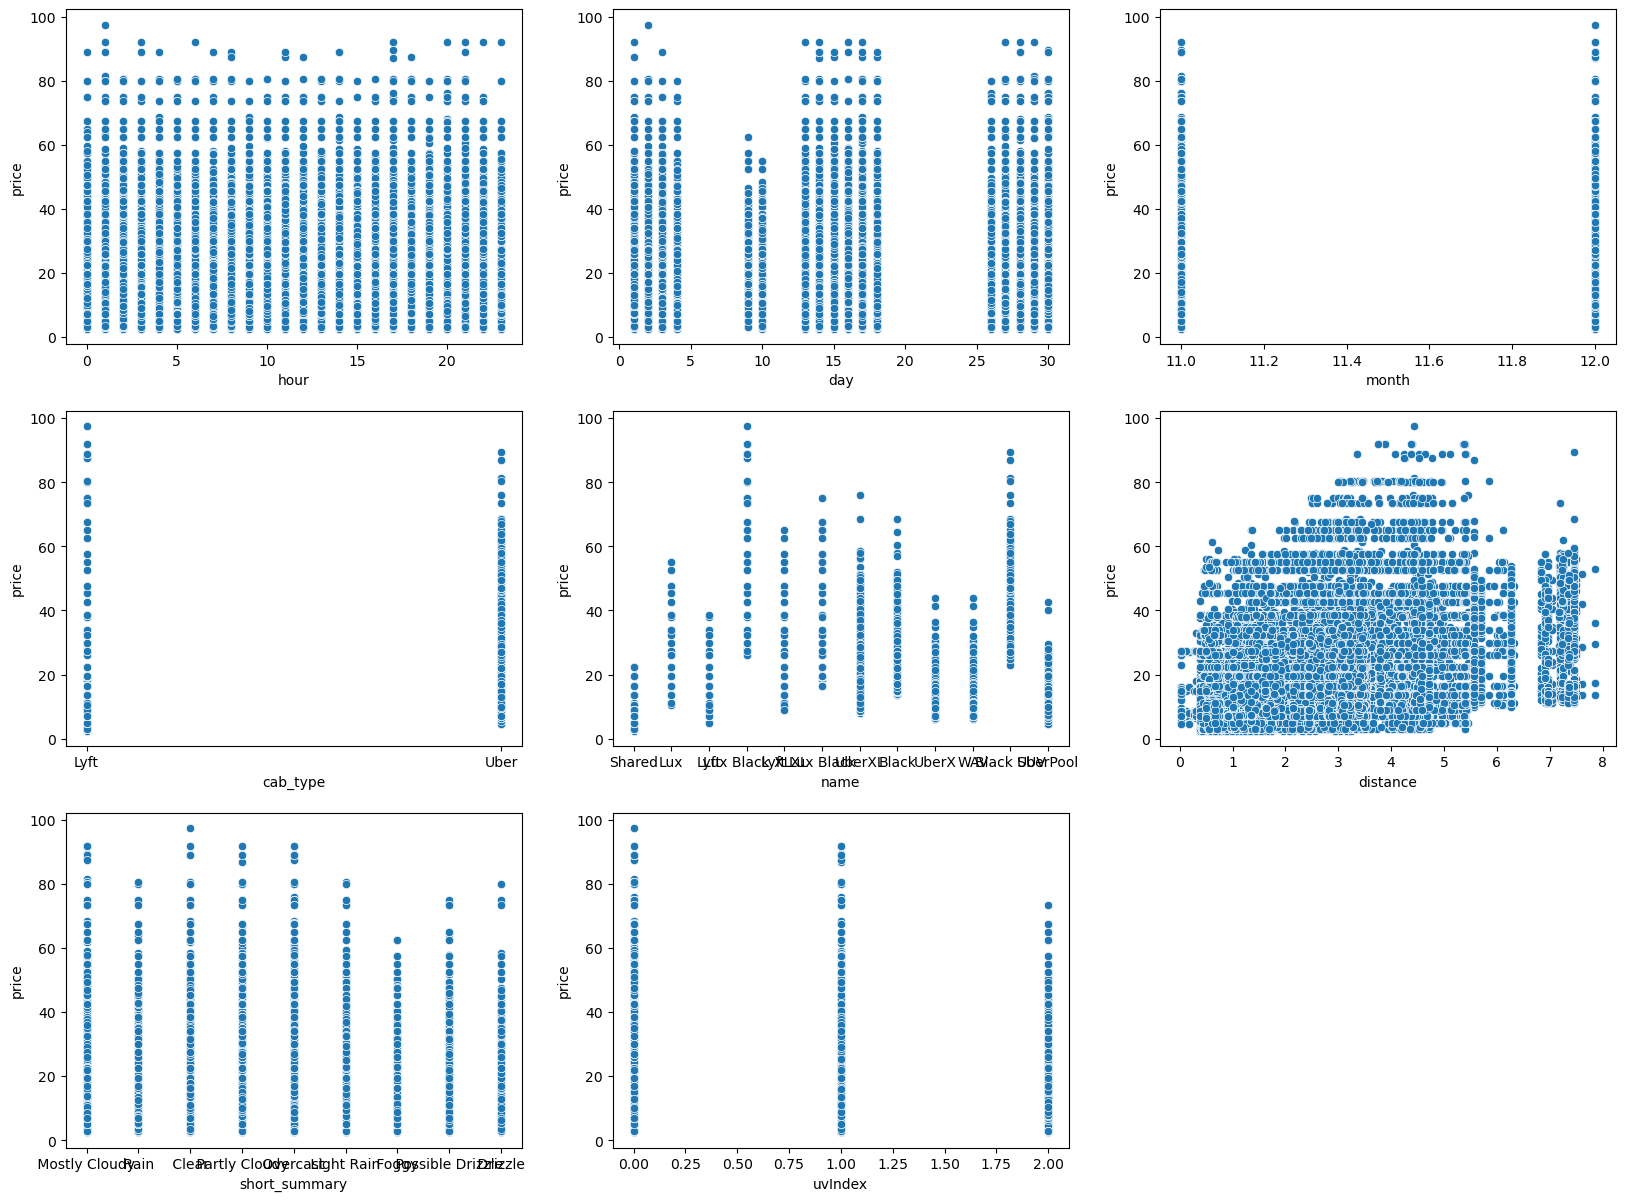

In [589]:
# Asumsi 1: Linear Relationship
# Check the hubungan independent variables and dependent variable
fig = plt.figure(figsize=(20, 20))
cols = df.drop('price', axis=1).columns.tolist()  # Mengambil semua kolom kecuali 'price'
num_rows = 4
num_cols = 3

for index in range(1, min(num_rows*num_cols, len(cols)) + 1):  # Gunakan min() untuk memastikan tidak melebihi jumlah kolom
    fig.add_subplot(num_rows, num_cols, index)
    sns.scatterplot(data=df, x=cols[index-1], y='price')
plt.show()

Berdasarkan scatter plot, hanya variabel distance yang memiliki hubungan linier dengan variabel dependen. Pada asumsi ini tidak terpenuhi secara baik. Oleh karena itu, akan diperiksa semua asumsi regresi linear lainnya.

### Asumsi 2: No or Little Multicollinearity

Asumsi kedua menjelaskan seberapa kuat korelasi masing-masing variabel independen (features) dan variabel dependen (target). Namun, apabila antar variabel independen memiliki korelasi kuat, maka akan menjelaskan informasi yang sama dan model jadi tidak mengetahui variabel mana yang sebenarnya melakukan perubahan terhadap target. Asumsi ini dapat diukur dengan Variance Inflation Factor (VIF). Apabila VIF 1 menunjukkan bahwa tidak ada multikolinearitas, sedangkan jika VIF 5 atau 10 menunjukkan bahwa terdapat multikolinearitas dalam model. 

In [590]:
# Drop kolom kategorikal dari DataFrame
X = df.drop(['price', 'cab_type', 'name', 'short_summary'], axis=1)

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return vif

calc_vif(X)

,variables,VIF
0,hour,4.273139
1,day,3.767113
2,month,9.024272
3,distance,4.689732
4,uvIndex,1.433550


Dari hasil tersebut menjelaskan bahwa variabel kolom numerik dalam model:
- Variabel hour memiliki VIF sebesar 4.27 yang menunjukkan bahwa variabel hour memiliki korelasi yang cukup kuat dengan variabel lain dalam model.
- Variabel day memiliki VIF sebesar 3.77 yang menunjukkan bahwa variabel day juga memiliki korelasi yang kuat dengan variabel lain dalam model.
- Variabel month memiliki VIF sebesar 9.02 yang menunjukkan bahwa variabel month memiliki korelasi yang lebih kuat dengan variabel lain dalam model daripada variabel lainnya.
- Variabel distance memiliki VIF sebesar 4.69 yang menunjukkan bahwa variabel distance memiliki korelasi yang cukup kuat dengan variabel lain dalam model.
- Variabel uvIndex memiliki VIF sebesar 1.43 yang menunjukkan bahwa variabel uvIndex memiliki korelasi yang rendah dengan variabel lain dalam model, atau mungkin tidak dipengaruhi secara signifikan oleh variabel lain dalam model.

Secara umum, jika VIF sebuah variabel melebihi 10, ini menandakan adanya multicollinearity yang signifikan dan perlu dipertimbangkan untuk diatasi, seperti dengan menghapus variabel tersebut dari model atau menggunakan teknik lain untuk mengurangi multicollinearity. Variabel dengan VIF di bawah 5 biasanya dianggap tidak terlalu dipengaruhi oleh multicollinearity.

### Asumsi 3: Multivariate Normality

Asumsi ini dapat dilakukan setelah model dibuat untuk memprediksi observasi dan membandingkan hasil aktual (y) dengan hasil prediksinya (ŷ). Selisih antara aktual dan prediksi disebut residu dan residu tersebut perlu mengikuti distribusi normal.

Cara memeriksa asumsi multivariate normality dengan plot QQ. Plot QQ yang ideal berupa garis lurus. Apabila plot QQ berbentuk selain garis lurus, model memiliki masalah atau sebenarnya hubungan features dan target tidak linier.

In [591]:
# Get residuals

y_test_residuals = y_test_cleaned - y_pred_test
y_test_residuals

182901   -1.270996
381813   -0.721436
578983   -0.193359
17040    -1.679199
322808   -2.025146
            ...   
256687    2.432861
659709    5.878174
533406   -0.996094
164554    2.681885
15163    -2.906006
Name: price, Length: 127614, dtype: float64

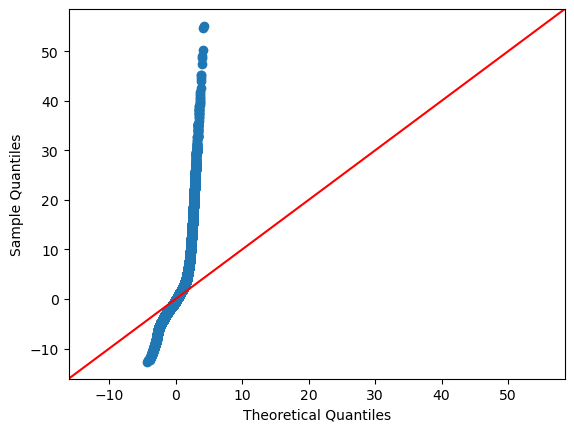

In [592]:
# Display QQ plot
sm.qqplot(y_test_residuals, line ='45')
plt.show()

Dapat terlihat bahwa QQ plot tidak membentuk garis lurus linear yang menandakan bahwa model ini tidak memenuhi asumsi multivariate normality.

### Asumsi 4: No Auto-Correlation

Asumsi ini menjelaskan bahwa residunya independen atau residu tidak boleh bertambah besar seiring berjalannya waktu. Asumsi ini dapat diperiksa dengan uji Durbin-Watson. Statistik uji Durbin-Watson berkisar antara 0-4 dimana :
- d = 2 menunjukkan tidak ada autokorelasi
- d <2 menunjukkan korelasi serial positif
- d > 2 menunjukkan korelasi serial negatif
Secara umum, jika 1,5 < d < 2,5 maka autokorelasi kemungkinan besar tidak perlu dikhawatirkan. Jika tidak, berpotensi terjadi masalah autokorelasi yang serius.

In [593]:
# Perform Durbin-Watson test

durbin_watson(y_test_residuals)

2.0011342853798286

Pada asumsi ini, model regresi linear saya dapat diterima karena nilai d hampir sama dengan 2 sehingga menunjukkan tidak ada autokorelasi.

### Asumsi 5: Homoscedasticity

Asumsi homoskedastisitas menjelaskan kesalahan yang konstan dengan mencari titik deviasi yang konstan dari garis nol. Varians non-konstan biasanya muncul karena ada outlier ekstrim sehingga terjadi heteroskedastisitas.

Cara mengukur asumsi ini adalah dengan membuat scatterplot dengan sisa-sisa terhadap variabel terikat. Jika plot sebar tidak membentuk pola apa pun dan tersebar secara acak di sekitar garis kecocokan maka residunya bersifat homoskedastik.

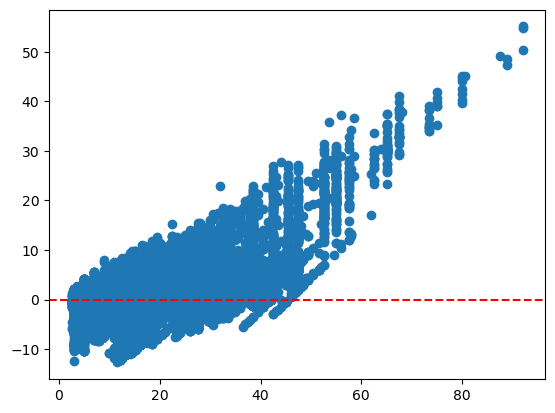

In [594]:
# Check homoscedasticioty

plt.scatter(y_test_cleaned, y_test_residuals)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.show()

Terlihat bahwa y_test_residuals dan y_test mempunyai pola linier yang cenderung naik. Artinya terjadi heteroskedastisitas. Asumsi ini juga tidak terpenuhi.

### Kesimpulan Asumsi
> Dari 5 asumsi regresi linear, model saya hanya memenuhi asumsi ke-4 yaitu no-auto correlation karena memiliki nilai d = 2.0011342853798286.

## Metrik Evaluasi Model Regresi Linear

Saya menggunakan keempat metrik model regresi linear untuk dibandingkan.

In [595]:
# Performa model berdasarkan metrik MAE, MSE, RMSE, R2 Score
print('Metrik MAE')
print('MAE Train Set :', mean_absolute_error(y_pred_train, filtered_values_y))
print('MAE Test Set :', mean_absolute_error(y_pred_test, y_test_cleaned))
print('='*40)
print('Metrik MSE')
print('MSE Train Set :', mean_squared_error(y_pred_train, filtered_values_y))
print('MSE Test Set :', mean_squared_error(y_pred_test, y_test_cleaned))
print('='*40)
print('Metrik RMSE')
print('RMSE Train Set :', np.sqrt(mean_squared_error(y_pred_train, filtered_values_y)))
print('RMSE Test Set :', np.sqrt(mean_squared_error(y_pred_test, y_test_cleaned)))
print('='*40)
print('Metrik R2 Score')
print('R2 Score Train Set :', r2_score(y_pred_train, filtered_values_y))
print('R2 Score Test Set :', r2_score(y_pred_test, y_test_cleaned))

Metrik MAE
MAE Train Set : 1.9230936350406733
MAE Test Set : 1.9635303628183673
Metrik MSE
MSE Train Set : 8.931555357885228
MSE Test Set : 9.36105214522377
Metrik RMSE
RMSE Train Set : 2.9885707885016255
RMSE Test Set : 3.0595836555361204
Metrik R2 Score
R2 Score Train Set : 0.8828189466908262
R2 Score Test Set : 0.8793649955840637


Berikut adalah insight dari keempat metrik regresi linear yang model regresi linear saya:

1. **Mean Absolute Error (MAE)**:
   - MAE Train Set: 1.92
   - MAE Test Set: 1.96
   - MAE mengukur rata-rata dari selisih absolut antara nilai prediksi dan nilai aktual. Semakin rendah nilai MAE, semakin baik kualitas prediksi model. Meskipun ada sedikit peningkatan dari train set ke test set, namun nilai MAE yang relatif rendah menunjukkan bahwa model cenderung memberikan prediksi yang dekat dengan nilai aktual.

2. **Mean Squared Error (MSE)**:
   - MSE Train Set: 8.93
   - MSE Test Set: 9.36
   - MSE mengukur rata-rata dari kuadrat selisih antara nilai prediksi dan nilai aktual. Seperti MAE, semakin rendah nilai MSE, semakin baik kualitas prediksi model. Meskipun ada sedikit peningkatan dari train set ke test set, namun nilai MSE yang relatif rendah menunjukkan bahwa model cenderung memberikan prediksi yang dekat dengan nilai aktual.

3. **Root Mean Squared Error (RMSE)**:
   - RMSE Train Set: 2.99
   - RMSE Test Set: 3.06
   - RMSE adalah akar kuadrat dari MSE, sehingga memiliki interpretasi yang lebih intuitif. RMSE yang rendah menunjukkan bahwa model memiliki kesalahan prediksi yang kecil.

4. **R-squared (R2) Score**:
   - R2 Score Train Set: 0.88
   - R2 Score Test Set: 0.88
   - R2 Score mengukur seberapa baik variabilitas dalam data yang dapat dijelaskan oleh model. Nilai R2 berkisar antara 0 dan 1, dengan nilai yang lebih tinggi menunjukkan model yang lebih baik dalam menjelaskan variabilitas data. R2 Score yang tinggi baik pada train set maupun test set menunjukkan bahwa model cukup baik dalam menjelaskan variabilitas dalam data.

Secara keseluruhan, metrik-metrik tersebut menunjukkan bahwa model regresi linear saya memiliki kualitas prediksi yang baik, dengan nilai-nilai yang stabil antara train set dan test set. Meskipun ada sedikit peningkatan dalam kesalahan prediksi dari train set ke test set, namun hal ini masih dalam rentang yang dapat diterima.

- Dari keempat metrik tersebut, saya memilih menggunakan MAE untuk memperkirakan error dari model yang saya buat karena lebih mudah diinterpretasikan. Insight metrik MAE:
    - Error train set 1,92 artinya jika harga adalah 16, maka kemungkinan model akan memprediksi lebih 1,92 atau kurang 1,92 sehingga range prediksi harga jika harga sebenarnya 16 adalah 14,08 - 17,92.
    - Error test set artinya jika harga adalah 16, maka kemungkinan model akan memprediksi lebih 1,96 atau kurang 1,96 sehingga range prediksi harga jika harga sebenarnya 16 adalah 14,04 - 17,96.
- Kemudian R2 Score juga akan digunakan untuk menunjukkan seberapa baik variabilitas harga perjalanan yang dapat dijelaskan oleh model. Dikarenakan nilai train dan test tidak jauh berbeda yaitu 0,88 di train dan 0,87 di test, model ini dapat dikatakan goodfit.

# ix. Model Saving
> Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model.

In [596]:
# Save file model linear regression
with open('model_lin.pkl', 'wb') as file_1: 
  pickle.dump(model_lin, file_1)

# Save file hasil model scaler
with open('model_scaler.pkl', 'wb') as file_2:
  pickle.dump(scaler, file_2)

# Save file hasil model encoder
with open('model_encoder.pkl', 'wb') as file_3:
  pickle.dump(encoder, file_3)

# Save file teks num_col yang terdiri dari kolom-kolom numerik
with open('num_col.txt', 'w') as file_4:
  json.dump(num_col, file_4)

# Save file teks cat_col yang terdiri dari kolom-kolom kategorik
with open('cat_col.txt', 'w') as file_5:
  json.dump(cat_col, file_5)

# x. Model Inference (different notebook)
> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

Terdapat dalam notebook "model_inference.ipynb"

# xi. Pengambilan Kesimpulan
> Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

## Kesimpulan Hasil

Kesimpulan Secara Keseluruhan:

1. **Dataset rideshare_kaggle**: Terdiri dari 57 kolom dengan 29 float, 17 integer, dan 11 object. Hanya kolom 'price' yang memiliki missing value.
2. **Missing Value**: Ada 55,095 missing values pada kolom 'price'.
3. **Skewness**: Beberapa fitur memiliki skewness signifikan, seperti 'surge_multiplier', 'precipIntensity', 'precipProbability', 'uvIndex', dan 'windGust'.
4. **Outlier**: Terdapat beberapa fitur dengan outlier yang signifikan seperti 'precipIntensity', 'precipProbability', dan 'windGust'.
5. **Frekuensi Harga**: Frekuensi pemesanan menurun seiring dengan kenaikan harga.
6. **Tipe Layanan**: Layanan UberX lebih diminati karena harganya lebih murah dibandingkan Lyft.
7. **Cuaca**: Frekuensi pemesanan cenderung tinggi saat cuaca mendung.
8. **Pengaruh Waktu**: Pemesanan tinggi saat jam sibuk, seperti jam 08.00 dan 17.00.
9. **Model Regresi Linear**: Model menggunakan regresi linear dengan hyperparameter default.
10. **Asumsi Regresi**: Model memenuhi asumsi no-autocorrelation, namun tidak memenuhi asumsi regresi linear lainnya.
11. **Metrik Evaluasi**: Menggunakan MAE dan R2 Score. MAE train set 1,92 dan test set 1,96. R2 Score train set 0,88 dan test set 0,87.
12. **Prediksi Harga**: Harga perjalanan dengan kondisi tertentu dapat diprediksi dengan model regresi linear.

Kesimpulan:
Proyek ini cukup mengembangkan model regresi linear untuk memprediksi harga perjalanan ride-hailing. Meskipun model memiliki kekurangan dalam memenuhi beberapa asumsi regresi linear, hasil evaluasi menunjukkan kinerja yang baik dengan MAE dan R2 Score yang dapat diterima. Model ini dapat membantu pengguna mengoptimalkan budget perjalanan mereka dan membuat keputusan yang lebih cerdas saat menggunakan layanan ride-hailing.

Saran untuk Improvisasi:

1. **Feature Engineering**: Telusuri fitur-fitur baru yang mungkin berkontribusi lebih baik dalam memprediksi harga perjalanan dan menghitung korelasi sebelum memilih feature yang akan digunakan.
2. **Penggunaan Model Lain**: Selain regresi linear, eksplorasi model-model lainnya yang mungkin lebih baik untuk memprediksi harga.
3. **Validasi Model yang Lebih Mendalam**: Lakukan validasi model yang lebih komprehensif, termasuk penggunaan teknik cross-validation untuk mengukur stabilitas dan konsistensi kinerja model.
4. **Tuning Hyperparameter**: Melakukan tuning hyperparameter pada model regresi linear untuk meningkatkan performa dan stabilitas model.
5. **Asumsi Regresi Linear**: Periksa kembali asumsi-asumsi regresi linear dan cari tahu apakah ada langkah-langkah tambahan yang dapat dilakukan untuk memenuhi asumsi-asumsi tersebut.
6. **Interpretasi Koefisien**: Lakukan interpretasi lebih mendalam dan lakukan regularisasi apabila valuenya kurang meyakinkan.
7. **Monitoring dan Iterasi**: Terus pantau kinerja model secara berkala dan lakukan iterasi untuk meningkatkan kualitas prediksi sesuai dengan perubahan data dan kebutuhan bisnis yang berkembang.

## Jawaban Conceptual Problems

### 1. Sebutkan dan jelaskan asumsi yang dipakai oleh Linear Regression !

- **Asumsi 1 : Linear Relationship**

    Asumsi regresi linear pertama menjelaskan bahwa hubungan variabel bebas (features) dana variabel terikat (target) harus linier. Jika tidak memenuhi asumsi ini, maka algoritma regresi akan gagal menangkap tren secara matematis sehingga model tidak efisien. 


- **Asumsi 2 : No or Little Multicollinearity**

    Asumsi kedua menjelaskan seberapa kuat korelasi masing-masing variabel independen (features) dan variabel dependen (target). Namun, apabila antar variabel independen memiliki korelasi kuat, maka akan menjelaskan informasi yang sama dan model jadi tidak mengetahui variabel mana yang sebenarnya melakukan perubahan terhadap target. Asumsi ini dapat diukur dengan Variance Inflation Factor (VIF). Apabila VIF 1 menunjukkan bahwa tidak ada multikolinearitas, sedangkan jika VIF 5 atau 10 menunjukkan bahwa terdapat multikolinearitas dalam model. 


- **Asumsi 3 : Multivariate Normality**

    Asumsi ini dapat dilakukan setelah model dibuat untuk memprediksi observasi dan membandingkan hasil aktual (y) dengan hasil prediksinya (ŷ). Selisih antara aktual dan prediksi disebut residu dan residu tersebut perlu mengikuti distribusi normal. Cara memeriksa asumsi multivariate normality dengan plot QQ. Plot QQ yang ideal berupa garis lurus. Apabila plot QQ berbentuk selain garis lurus, model memiliki masalah atau sebenarnya hubungan features dan target tidak linier.


- **Asumsi 4 : No Auto-Correlation**

    Asumsi ini menjelaskan bahwa residunya independen atau residu tidak boleh bertambah besar seiring berjalannya waktu. Asumsi ini dapat diperiksa dengan uji Durbin-Watson. Statistik uji Durbin-Watson berkisar antara 0-4 dimana :
    - d = 2 menunjukkan tidak ada autokorelasi
    - d <2 menunjukkan korelasi serial positif
    - d > 2 menunjukkan korelasi serial negatif
    Secara umum, jika 1,5 < d < 2,5 maka autokorelasi kemungkinan besar tidak perlu dikhawatirkan. Jika tidak, berpotensi terjadi masalah autokorelasi yang serius.


- **Asumsi 5 : Homoscedasticity**

    Asumsi homoskedastisitas menjelaskan kesalahan yang konstan dengan mencari titik deviasi yang konstan dari garis nol. Varians non-konstan biasanya muncul karena ada outlier ekstrim sehingga terjadi heteroskedastisitas. Cara mengukur asumsi ini adalah dengan membuat scatterplot dengan sisa-sisa terhadap variabel terikat. Jika plot sebar tidak membentuk pola apa pun dan tersebar secara acak di sekitar garis kecocokan maka residunya bersifat homoskedastik.

### 2. Tunjukkan dan tafsirkan arti dari slope dan intercept yang didapat dari model yang telah Anda bangun !

In [597]:
# check coefficient dan intercept
intercept = model_lin.intercept_
coefficient = model_lin.coef_

print('Intercept: ', intercept)
print('Coefficient: ', coefficient)

Intercept:  2148655141299.5935
Coefficient:  [ 1.34816383e-02  1.54435771e-02  8.14374507e-03  1.56964031e+01
 -2.80906840e-02  7.11955218e+11 -1.70495945e+12 -5.35435299e+11
 -5.35435299e+11 -5.35435299e+11 -5.35435299e+11 -5.35435299e+11
 -5.35435299e+11 -5.35435299e+11 -5.35435299e+11 -5.35435299e+11
  9.17396083e+10  9.17396084e+10 -2.32517506e+12 -2.32517506e+12
 -2.32517506e+12 -2.32517506e+12 -2.32517506e+12 -2.32517506e+12
  9.17396083e+10  9.17396083e+10  9.17396083e+10  9.17396083e+10]


**Intercept (Intersepsi)**:
Intercept merupakan nilai dari variabel dependen (harga perjalanan) ketika semua variabel independen (fitur-fitur lain yang digunakan dalam model) bernilai nol. Dalam konteks ini, intercept adalah 2148655141299.5935. Dengan kata lain, jika semua fitur lainnya bernilai nol, harga perjalanan yang diprediksi akan dimulai dari nilai intercept ini.

**Coefficient (Koefisien)**:
Koefisien menggambarkan seberapa besar perubahan dalam variabel dependen yang diharapkan ketika variabel independen meningkat satu unit. Dalam kasus ini, setiap koefisien berhubungan dengan fitur tertentu dalam model regresi linear. Sebagai contoh, koefisien untuk 'hour' adalah 0.0134816383, yang berarti bahwa untuk setiap peningkatan satu unit dalam 'hour', harga perjalanan yang diprediksi akan meningkat sebesar 0.0134816383.

**Tafsir**:
Dengan intercept yang besar dan koefisien yang beragam, model regresi linear mungkin masih overfitting atau variabel yang tidak relevan telah dimasukkan ke dalam model. Penelitian lebih lanjut diperlukan untuk mengevaluasi validitas dan relevansi fitur-fitur tersebut terhadap prediksi harga perjalanan. Selain itu, koefisien yang memiliki nilai yang besar atau tidak masuk akal mungkin menunjukkan adanya masalah dalam pengukuran atau preprocessing data.